In [1]:
import os
import random
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, GlobalMaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img_width , img_height = 224 , 224
batch_size = 32
num_classes = 2
epochs = 10

In [3]:
data_dir = 'E:/4th year/2nd semester/Deep Learning/assignment/archive_3/train'

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2 
)

In [5]:
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',  
    subset='training'  
)

Found 4187 images belonging to 2 classes.


In [6]:
validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation' 
)

Found 1045 images belonging to 2 classes.


In [7]:
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))


In [8]:
for layer in base_model.layers:
    layer.trainable = False

In [9]:
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

In [10]:
model = Model(inputs=base_model.input, outputs=output)

In [13]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


In [14]:
model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

Epoch 1/10
131/131 [==============================] - 974s 7s/step - loss: 0.2938 - accuracy: 0.8791 - val_loss: 0.1699 - val_accuracy: 0.9273
Epoch 2/10
131/131 [==============================] - 993s 8s/step - loss: 0.1681 - accuracy: 0.9341 - val_loss: 0.1699 - val_accuracy: 0.9359
Epoch 3/10
131/131 [==============================] - 1023s 8s/step - loss: 0.1554 - accuracy: 0.9355 - val_loss: 0.1330 - val_accuracy: 0.9502
Epoch 4/10
131/131 [==============================] - 1019s 8s/step - loss: 0.1519 - accuracy: 0.9415 - val_loss: 0.1317 - val_accuracy: 0.9435
Epoch 5/10
131/131 [==============================] - 983s 7s/step - loss: 0.1352 - accuracy: 0.9479 - val_loss: 0.1189 - val_accuracy: 0.9550
Epoch 6/10
131/131 [==============================] - 931s 7s/step - loss: 0.1208 - accuracy: 0.9527 - val_loss: 0.1587 - val_accuracy: 0.9321
Epoch 7/10
131/131 [==============================] - 938s 7s/step - loss: 0.1253 - accuracy: 0.9556 - val_loss: 0.1180 - val_accuracy: 0.95

In [29]:
test_data = 'E:/4th year/2nd semester/Deep Learning/assignment/archive_3/test'
test_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_generator = test_datagen.flow_from_directory(
    test_data,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle = False
)

Found 624 images belonging to 2 classes.


In [19]:
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

20/20 [==============================] - 120s 6s/step - loss: 0.2469 - accuracy: 0.9135
Test accuracy: 91.35%


In [23]:
model.save('E:/4th year/2nd semester/VGG19-2.h5')

C:\Users\gf63\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


20/20 [==============================] - 114s 6s/step


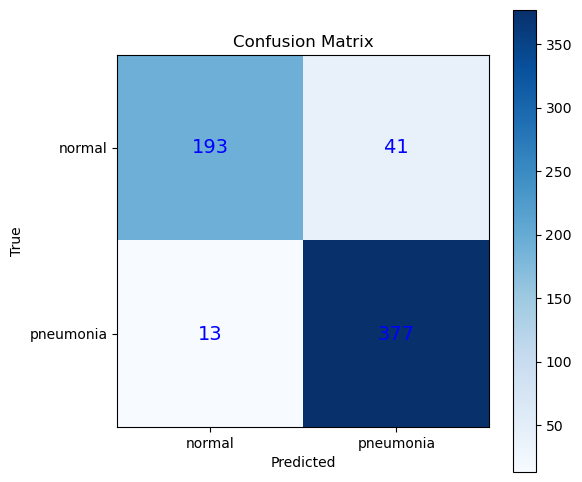

In [31]:
y_pred = model.predict(test_generator, steps=len(test_generator), verbose=1)
y_pred_binary = np.round(y_pred)
y_true = test_generator.classes
confusion_mat = confusion_matrix(y_true, y_pred_binary)
plt.figure(figsize=(6, 6))
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.Blues)
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(confusion_mat[i][j]), ha='center', va='center', color='blue', fontsize=14)

plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['normal', 'pneumonia'])
plt.yticks([0, 1], ['normal', 'pneumonia'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [32]:
training_loss = []
training_accuracy = []
validation_loss = []
validation_accuracy = []

In [33]:
epochs = 10  # Adjust as needed

for epoch in range(epochs):
    # Train the model for one epoch
    history = model.fit(
        train_generator,
        epochs=1,  # Train for one epoch
        validation_data=validation_generator
    )
    
    # Extract and append loss and accuracy values for this epoch
    training_loss.append(history.history['loss'][0])
    training_accuracy.append(history.history['accuracy'][0])
    validation_loss.append(history.history['val_loss'][0])
    validation_accuracy.append(history.history['val_accuracy'][0])



131/131 [==============================] - 1113s 8s/step - loss: 0.0911 - accuracy: 0.9661 - val_loss: 0.1011 - val_accuracy: 0.9560


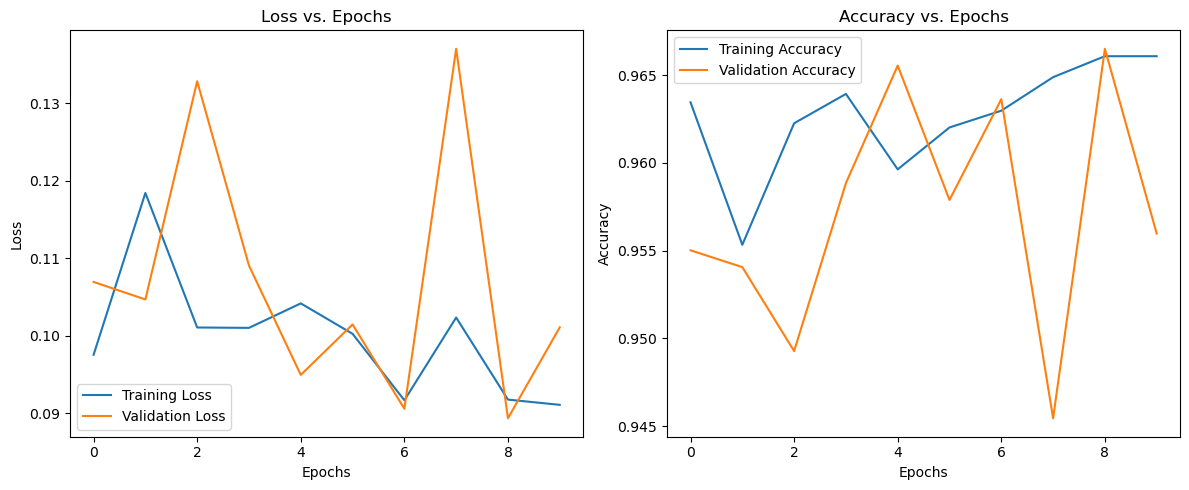

In [34]:
plt.figure(figsize=(12, 5))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

In [35]:
from sklearn.metrics import classification_report
class_names = ['Normal', 'Pneumonia']  # Replace with your class names
report = classification_report(y_true, y_pred_binary, target_names=class_names)

# Print the classification report
print(report)

              precision    recall  f1-score   support

      Normal       0.94      0.82      0.88       234
   Pneumonia       0.90      0.97      0.93       390

    accuracy                           0.91       624
   macro avg       0.92      0.90      0.91       624
weighted avg       0.92      0.91      0.91       624

